In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles


In [20]:
# let's make a simple visit:
names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'expMJD']
dtypes = [float, float, float, float]
obs = np.zeros(1, dtype=list(zip(names, dtypes)))
lonRot=180.
latRot = 0.
obs['fieldRA'] = lonRot

In [14]:
dbFile = 'minion_1016_sqlite.db'
#conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
nside=512

In [15]:
bundleList = []

metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixSlicer(nside=nside, latLonDeg=True, useCamera=False, mjdColName='expMJD')
sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [16]:
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


In [17]:
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
# bg1.plotAll(closefigs=False)

Running:  ['opsim_Count_expMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


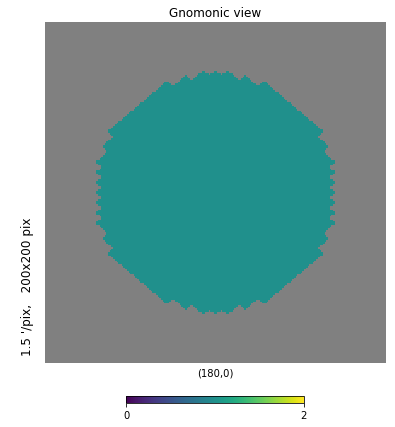

In [21]:
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_expMJD_HEAL']


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


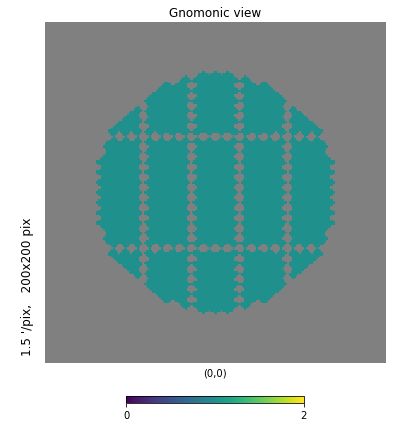

In [8]:
bundleList = []

metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixSlicer(nside=nside, latLonDeg=True, useCamera=True, mjdColName='expMJD')
sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_expMJD_HEAL']


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


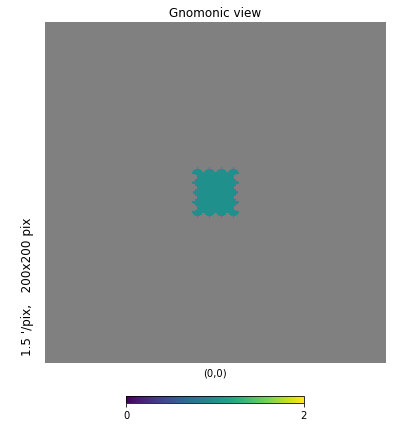

In [9]:
bundleList = []
center_raft_chips = ['R:2,2 S:0,0', 'R:2,2 S:0,1', 'R:2,2 S:0,2',
                     'R:2,2 S:1,0', 'R:2,2 S:1,1', 'R:2,2 S:1,2',
                     'R:2,2 S:2,0', 'R:2,2 S:2,1', 'R:2,2 S:2,2']

metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixSlicer(nside=nside, latLonDeg=True, useCamera=True,
                               chipNames=center_raft_chips, mjdColName='expMJD')
sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_expMJD_HEAL']


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


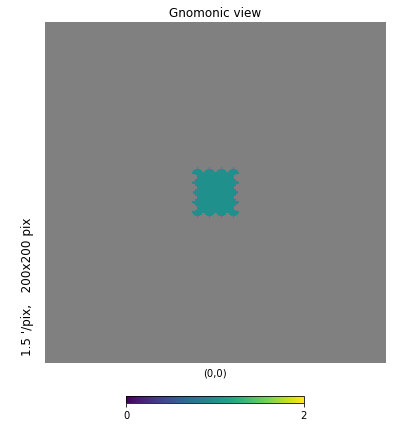

In [10]:
bundleList = []
slicer = slicers.HealpixComCamSlicer(nside=nside, useCamera=True, mjdColName='expMJD')
metric = metrics.CountMetric(col='expMJD')

sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_expMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


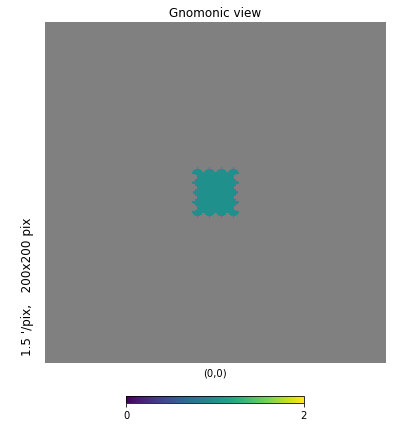

In [11]:
bundleList = []
slicer = slicers.HealpixComCamSlicer(nside=nside, useCamera=False, mjdColName='expMJD')
metric = metrics.CountMetric(col='expMJD')

sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_expMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


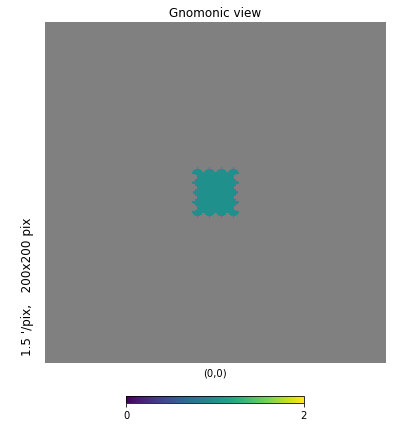

In [12]:
bundleList = []
slicer = slicers.HealpixComCamSlicer(nside=nside, useCamera=False, radius=2., mjdColName='expMJD')
metric = metrics.CountMetric(col='expMJD')

sql = ''
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd1 = metricBundles.makeBundlesDictFromList(bundleList)
bg1 = metricBundles.MetricBundleGroup(bd1, None, outDir=outDir, resultsDb=resultsDb)
bg1.setCurrent('')
bg1.runCurrent('', simData=obs)
hp.gnomview(bd1['opsim_Count_expMJD_HEAL'].metricValues, rot=(lonRot, latRot, 0))